In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import sklearn
from sklearn.linear_model import LinearRegression 
import pylab as plt 
%matplotlib inline 
from sklearn import linear_model
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv',header=0)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
df.replace(" ", np.nan, inplace = True)
df.dropna(subset=["TotalCharges"], axis=0, inplace = True)
df.reset_index(drop = True, inplace = True)
cleanup_nums = {"PhoneService": {"Yes": 1, "No": 0}, "PaperlessBilling": {"Yes": 1, "No": 0}, "Churn": {"Yes": 1, "No": 0}}
df.replace(cleanup_nums, inplace=True)
cleanup_nums = {"MultipleLines": {"Yes": 1, "No": 0, "No phone service": 2}}
df.replace(cleanup_nums, inplace=True)
cleanup_nums = {"InternetService": {"Fiber optic": 1, "DSL": 2, "No": 0}}
df.replace(cleanup_nums, inplace=True)
cleanup_nums = {"OnlineSecurity": {"Yes": 1, "No": 0, "No internet service": 2}, "DeviceProtection": {"Yes": 1, "No": 0, "No internet service": 2}, "TechSupport": {"Yes": 1, "No": 0, "No internet service": 2}, "StreamingTV": {"Yes": 1, "No": 0, "No internet service": 2}, "StreamingMovies": {"Yes": 1, "No": 0, "No internet service": 2}, "Contract": {"Month-to-month": 1, "Two year": 3, "One year": 2}, "PaymentMethod": {"Electronic check": 1, "Mailed check": 2, "Bank transfer (automatic)": 3, "Credit card (automatic)": 4}}
df.replace(cleanup_nums, inplace=True)
cleanup_nums = {"OnlineBackup": {"Yes": 1, "No": 0, "No internet service": 2}}
df.replace(cleanup_nums, inplace=True)
cleanup_nums = {"gender": {"Male": 1, "Female": 0}, "Partner": {"Yes": 1, "No": 0}, "Dependents": {"Yes": 1, "No": 0}}
df.replace(cleanup_nums, inplace=True)

In [3]:
print (df)

      customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
0     7590-VHVEG       0              0        1           0       1   
1     5575-GNVDE       1              0        0           0      34   
2     3668-QPYBK       1              0        0           0       2   
3     7795-CFOCW       1              0        0           0      45   
4     9237-HQITU       0              0        0           0       2   
5     9305-CDSKC       0              0        0           0       8   
6     1452-KIOVK       1              0        0           1      22   
7     6713-OKOMC       0              0        0           0      10   
8     7892-POOKP       0              0        1           0      28   
9     6388-TABGU       1              0        0           1      62   
10    9763-GRSKD       1              0        1           1      13   
11    7469-LKBCI       1              0        0           0      16   
12    8091-TTVAX       1              0        1           0    

In [4]:
data = df[['tenure']]
x = data.values
Y = df[['Churn']]
y = Y.values

In [14]:
from sklearn.model_selection import cross_val_predict
from sklearn import linear_model 
df = df.drop('customerID', axis = 1)
lr = lr = linear_model.LinearRegression()
predicted = cross_val_predict(lr, df, y, cv=20)

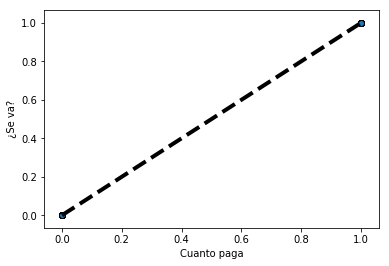

In [16]:
fig, ax = plt.subplots()
ax.scatter(y, predicted, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Cuanto paga')
ax.set_ylabel('¿Se va?')
plt.show()